# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
import json
import os
import pandas as pd
import requests
import numpy as np

Cities_to_load = "../output_data/cities.csv"

# Read School and Student Data File and store into Pandas DataFrames
City_data = pd.read_csv(Cities_to_load)

# Combine the data into a single dataset.  
City_df = pd.DataFrame(City_data)
City_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [84]:
Cities = []
Cities = City_df['City'].unique()
Cities

array(['ostrovnoy', 'mahebourg', 'qaanaaq', 'zhuhai', 'cape town',
       'atuona', 'flinders', 'opuwo', 'tiksi', 'pushkinskiye gory',
       'aykhal', 'castro', 'avarua', 'saskylakh', 'constitucion',
       'albany', 'vilyuysk', 'ushuaia', 'bambous virieux', 'kodinsk',
       'teknaf', 'busselton', 'ambon', 'maragogi', 'fallon', 'kantang',
       'colonelganj', 'punta arenas', 'rikitea', 'new norfolk', 'gobabis',
       'qingdao', 'port hardy', 'arman', 'mamakan', 'bethel', 'clinton',
       'varhaug', 'ayan', 'mayor pablo lagerenza', 'hermanus', 'torbay',
       'yellowknife', 'kruisfontein', 'puerto ayora', 'rosita', 'beloha',
       'port elizabeth', 'port alfred', 'garchitorena', 'kodiak',
       'mar del plata', 'taybad', 'cabo san lucas', 'tiarei', 'khatanga',
       'pisco', 'kolyvan', 'hofn', 'bontang', 'sault sainte marie',
       'zhigansk', 'thompson', 'pevek', 'nanortalik', 'bilibino',
       'dikson', 'hambantota', 'beja', 'fortuna', 'ponta do sol',
       'qasigiannguit'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# Dependencies
import requests
from config import weather_api_key

lat = []
lng = []
Maxtemp = []
Humidity = []
cloudiness = []
WindSpeed = []
Country = []
Dat = []


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for City in Cities:
    #Get City from City row
    print(f"Processing record: {City}")

    City_Request = requests.get(query_url + City).json()
    # assemble url and make API request
    lat.append(City_Request['coord']['lat'])
    lng.append(City_Request['coord']['lon'])
    Maxtemp.append(City_Request['main']['temp_max'])
    Humidity.append(City_Request['main']['humidity'])
    cloudiness.append(City_Request['clouds']['all'])
    WindSpeed.append(City_Request['wind']['speed'])
    Country.append(City_Request['sys']['country'])
    Dat.append(City_Request['dt'])

Processing record: ostrovnoy
Processing record: mahebourg
Processing record: qaanaaq
Processing record: zhuhai
Processing record: cape town
Processing record: atuona
Processing record: flinders
Processing record: opuwo
Processing record: tiksi
Processing record: pushkinskiye gory
Processing record: aykhal
Processing record: castro
Processing record: avarua
Processing record: saskylakh
Processing record: constitucion
Processing record: albany
Processing record: vilyuysk
Processing record: ushuaia
Processing record: bambous virieux
Processing record: kodinsk
Processing record: teknaf
Processing record: busselton
Processing record: ambon
Processing record: maragogi
Processing record: fallon
Processing record: kantang
Processing record: colonelganj
Processing record: punta arenas
Processing record: rikitea
Processing record: new norfolk
Processing record: gobabis
Processing record: qingdao
Processing record: port hardy
Processing record: arman
Processing record: mamakan
Processing record: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
weather_dict = {
    "city": Cities,
    "lat": lat,
    "Lng": lng,
    "Max Temp": Maxtemp,
    "Humidity": Humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": WindSpeed,
    "Country": Country,
    "Date": Dat
}
Cities_DF = pd.DataFrame(weather_dict)
Cities_DF.to_csv("../Output_data/CitiesOutput.csv")
Cities_DF.head()

,city,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.0531,39.5131,9.80,68,88,8.85,RU,1627219717
1,mahebourg,-20.4081,57.7000,23.16,64,40,5.14,MU,1627219886
2,qaanaaq,77.4840,-69.3632,4.13,70,77,3.22,GL,1627219887
3,zhuhai,22.2769,113.5678,31.09,84,20,4.63,CN,1627219736
4,cape town,-33.9258,18.4232,23.23,12,0,2.57,ZA,1627219601


In [87]:
Cities_DF.describe()

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.502709,22.445368,21.753613,68.890511,55.032847,3.379544,1.627220e+09
std,33.404166,91.906309,8.218081,22.430613,39.286028,2.387998,1.419740e+02
min,-54.800000,-175.200000,1.030000,5.000000,0.000000,0.000000,1.627220e+09
25%,-6.473700,-62.060550,15.742500,57.000000,14.000000,1.550000,1.627220e+09
50%,20.880800,25.676700,23.215000,75.500000,65.000000,3.050000,1.627220e+09
75%,47.892200,108.176850,27.125000,86.000000,95.250000,4.565000,1.627220e+09
max,78.218600,179.316700,44.360000,100.000000,100.000000,12.760000,1.627220e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
Cities_Filtered = Cities_DF.loc[(Cities_DF["Humidity"] < 100)]
Cities_Filtered.describe()

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.235415,23.139318,21.845498,68.546125,54.830258,3.390886,1.627220e+09
std,33.316034,91.183901,8.187586,22.312780,39.369344,2.393420,1.424514e+02
min,-54.800000,-173.300000,1.030000,5.000000,0.000000,0.000000,1.627220e+09
25%,-6.587700,-60.566350,15.802500,57.000000,14.000000,1.555000,1.627220e+09
50%,20.788250,26.190100,23.245000,75.000000,64.000000,3.070000,1.627220e+09
75%,47.691650,108.381150,27.155000,85.000000,96.750000,4.575000,1.627220e+09
max,78.218600,179.316700,44.360000,99.000000,100.000000,12.760000,1.627220e+09


In [89]:
#  Get the indices of cities that have humidity over 100%.
Cities_Humid_100 = Cities_DF.loc[(Cities_DF["Humidity"] >= 100)]
Cities_Humid_100.head()

,city,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
32,port hardy,50.6996,-127.4199,11.10,100,75,1.03,CA,1627219908
139,vaini,-21.2000,-175.2000,20.09,100,20,0.51,TO,1627219990
164,kathmandu,27.7167,85.3167,22.12,100,75,3.09,NP,1627219958
175,clyde river,70.4692,-68.5914,2.13,100,90,5.14,CA,1627220017
241,anadyr,64.7500,177.4833,11.28,100,90,1.79,RU,1627220066


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

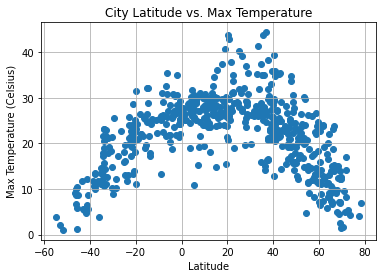

In [90]:
import matplotlib.pyplot as plt

# Create a data frame from cities, lat and temp
plt.scatter(Cities_Filtered["lat"],Cities_Filtered["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Humidity Plot

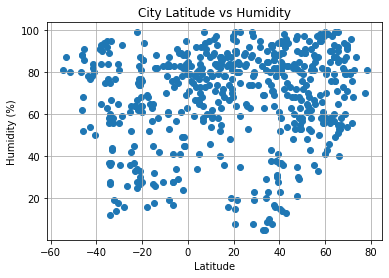

In [91]:
# Create a data frame from cities, lat and temp
plt.scatter(Cities_Filtered["lat"],Cities_Filtered["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Cloudiness Plot

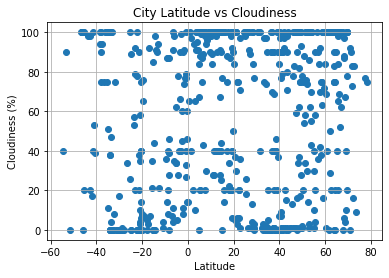

In [92]:
# Create a data frame from cities, lat and temp
plt.scatter(Cities_Filtered["lat"],Cities_Filtered["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Wind Speed Plot

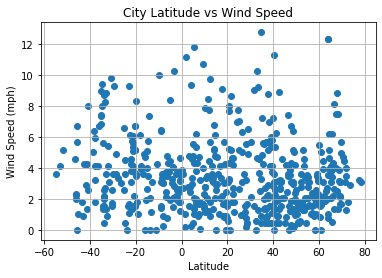

In [93]:
# Create a data frame from cities, lat and temp
plt.scatter(Cities_Filtered["lat"],Cities_Filtered["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [94]:
# Create Dataframes for Northern and Southern Hemisphere
NorthHem = Cities_Filtered.loc[(Cities_Filtered["lat"] > 0)]
SouthHem = Cities_Filtered.loc[(Cities_Filtered["lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.26x +32.67
The r-value is: 0.4163341042679078


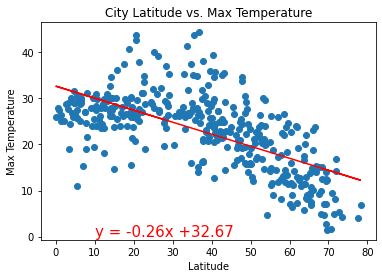

In [95]:
# Create a data frame from cities, lat and temp
# Linear Regression model
from scipy import stats

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(NorthHem["lat"],NorthHem["Max Temp"])
# Get regression values
regress_values = NorthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(NorthHem["lat"],NorthHem["Max Temp"], marker="o")
plt.plot(NorthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.43x +29.13
The r-value is: 0.6552687569597905


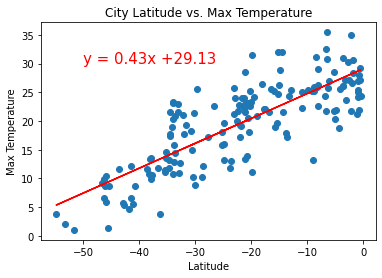

In [96]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(SouthHem["lat"],SouthHem["Max Temp"])
# Get regression values
regress_values = SouthHem["lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(SouthHem["lat"],SouthHem["Max Temp"], marker="o")
plt.plot(SouthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.01x +70.65
The r-value is: 7.799685372212201e-05


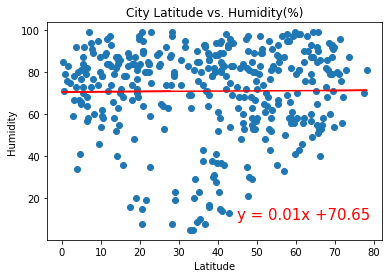

In [97]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(NorthHem["lat"],NorthHem["Humidity"])
# Get regression values
regress_values = NorthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(NorthHem["lat"],NorthHem["Humidity"], marker="o")
plt.plot(NorthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity(%)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.14x +60.13
The r-value is: 0.006707329631404675


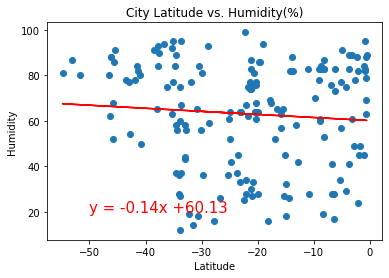

In [98]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(SouthHem["lat"],SouthHem["Humidity"])
# Get regression values
regress_values = SouthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(SouthHem["lat"],SouthHem["Humidity"], marker="o")
plt.plot(SouthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity(%)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.09x +62.94
The r-value is: 0.0024783660637601726


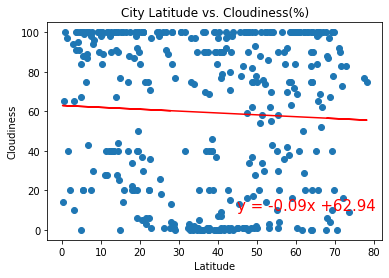

In [99]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(NorthHem["lat"],NorthHem["Cloudiness"])
# Get regression values
regress_values = NorthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(NorthHem["lat"],NorthHem["Cloudiness"], marker="o")
plt.plot(NorthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.28x +38.68
The r-value is: 0.00996071996014156


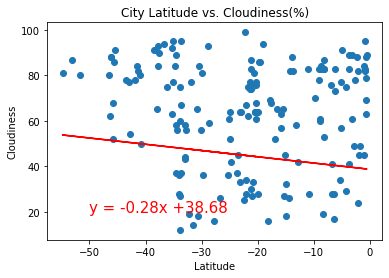

In [100]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(SouthHem["lat"],SouthHem["Cloudiness"])
# Get regression values
regress_values = SouthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(SouthHem["lat"],SouthHem["Humidity"], marker="o")
plt.plot(SouthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x +3.52
The r-value is: 0.004543440959949415


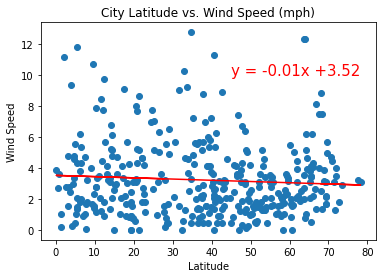

In [101]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(NorthHem["lat"],NorthHem["Wind Speed"])
# Get regression values
regress_values = NorthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(NorthHem["lat"],NorthHem["Wind Speed"], marker="o")
plt.plot(NorthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +3.29
The r-value is: 0.01692280483894071


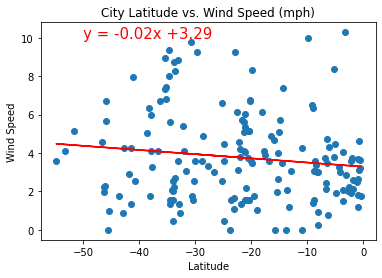

In [103]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(SouthHem["lat"],SouthHem["Wind Speed"])
# Get regression values
regress_values = SouthHem["lat"]* slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(SouthHem["lat"],SouthHem['Wind Speed'], marker="o")
plt.plot(SouthHem["lat"],regress_values,"r-")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
# Print r value
print(line_eq)
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()